In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

**回归任务**

In [17]:
#加载数据集
features = torch.rand(10000, 500)
labels = (0.0056 * features).sum(dim=1) + 0.028
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()), dtype=torch.float)

train_features = features[:7000,:]
train_labels = labels[:7000]

test_features = features[7000:,:]
test_lables = labels[7000:]

In [18]:
#定义数据迭代器
train_dataset = torch.utils.data.TensorDataset(train_features,train_labels)
test_dataset = torch.utils.data.TensorDataset(test_features,test_lables)

batch_size = 100
train_iter = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_iter = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [19]:
# 定义网络
class LinearNet(nn.Module):
    def __init__(self,n_feature,num_model):
        super(LinearNet,self).__init__()
        self.num_model = num_model
        self.model1 = nn.Sequential(
                        nn.Linear(n_feature,250),
                        nn.Sigmoid(),
                        nn.Linear(250,1))
        self.model2 = nn.Sequential(
                        nn.Linear(n_feature,250),
                        nn.Tanh(),
                        nn.Linear(250,1))
        self.model3 = nn.Sequential(
                        nn.Linear(n_feature,250),
                        nn.ReLU(),
                        nn.Linear(250,1))
    
    def forward(self,x):
        assert self.num_model <= 3
        if self.num_model == 1:
            y = self.model1(x)
        elif self.num_model == 2:
            y = self.model2(x)
        else:
            y = self.model3(x)
        return y

In [22]:
#模型训练
def train():
    num_epochs = 10
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_iter:
            l=loss(net(X),y.view(-1,1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls, count = 0, 0
        for X,y in test_iter:
            l=loss(net(X),y.view(-1,1))
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [24]:
num_inputs = 500
re_Train_ls, re_Test_ls = [], []
for i in range(1,4):
    net = LinearNet(num_inputs,i)
    for param in net.parameters():
        nn.init.normal_(param,mean=0, std= 0.01)
    loss = nn.MSELoss()
    optimizer = torch.optim.SGD(net.parameters(),lr=0.001)
    train_ls, test_ls = train()
    re_Train_ls.append(train_ls)
    re_Test_ls.append(test_ls)

epoch: 1, train loss: 0.001207, test loss: 0.000014
epoch: 2, train loss: 0.000014, test loss: 0.000014
epoch: 3, train loss: 0.000014, test loss: 0.000014
epoch: 4, train loss: 0.000014, test loss: 0.000014
epoch: 5, train loss: 0.000014, test loss: 0.000014
epoch: 6, train loss: 0.000014, test loss: 0.000014
epoch: 7, train loss: 0.000014, test loss: 0.000014
epoch: 8, train loss: 0.000014, test loss: 0.000014
epoch: 9, train loss: 0.000014, test loss: 0.000014
epoch: 10, train loss: 0.000014, test loss: 0.000014
epoch: 1, train loss: 0.006797, test loss: 0.000234
epoch: 2, train loss: 0.000038, test loss: 0.000005
epoch: 3, train loss: 0.000005, test loss: 0.000005
epoch: 4, train loss: 0.000005, test loss: 0.000005
epoch: 5, train loss: 0.000005, test loss: 0.000005
epoch: 6, train loss: 0.000005, test loss: 0.000005
epoch: 7, train loss: 0.000005, test loss: 0.000005
epoch: 8, train loss: 0.000005, test loss: 0.000005
epoch: 9, train loss: 0.000005, test loss: 0.000005
epoch: 10, 

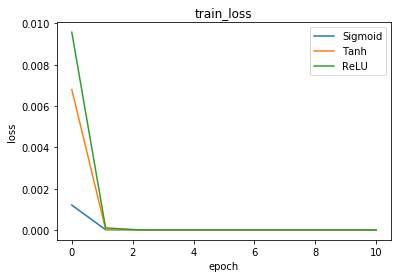

In [46]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,re_Train_ls[0],label='Sigmoid',linewidth=1.5)
plt.plot(x,re_Train_ls[1],label='Tanh',linewidth=1.5)
plt.plot(x,re_Train_ls[2],label='ReLU',linewidth=1.5)
my_x_ticks = np.arange(0, 12, 2)
plt.xticks(my_x_ticks)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('train_loss')
plt.show()

**二分类任务**

In [25]:
#生成数据
x1 = torch.tensor(np.random.normal(2,1,(5000,200)), dtype=torch.float)
x1_labels = torch.ones((5000))
x2 = torch.tensor(np.random.normal(-2,1,(5000,200)), dtype=torch.float)
x2_labels = torch.zeros((5000))
class_2_features = torch.cat((x1,x2),dim=0)
class_2_labels = torch.cat((x1_labels,x2_labels))
index = [i for i in range(len(class_2_labels))]
np.random.shuffle(index)
train_class_2_features = class_2_features[index[:7000],:]
test_class_2_features = class_2_features[index[7000:],:]
train_class_2_labels = class_2_labels[index[:7000]]
test_class_2_labels = class_2_labels[index[7000:]]

In [26]:
#生成数据迭代器
train_dataset = torch.utils.data.TensorDataset(train_class_2_features, train_class_2_labels)
test_dataset = torch.utils.data.TensorDataset(test_class_2_features, test_class_2_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

In [41]:
# 定义网络
class class_LinearNet(nn.Module):
    def __init__(self,n_feature,num_model):
        super(class_LinearNet,self).__init__()
        self.num_model = num_model
        self.model1 = nn.Sequential(
                        nn.Linear(n_feature,100),
                        nn.ReLU(),
                        nn.Linear(100,1),
                        nn.Sigmoid())
        self.model2 = nn.Sequential(
                        nn.Linear(n_feature,100),
                        nn.Tanh(),
                        nn.Linear(100,1),
                        nn.Sigmoid())
        self.model3 = nn.Sequential(
                        nn.Linear(n_feature,100),
                        nn.LeakyReLU(0.2),
                        nn.Linear(100,1),
                        nn.Sigmoid())
    
    def forward(self,x):
        assert self.num_model <= 3
        if self.num_model == 1:
            y = self.model1(x)
        elif self.num_model == 2:
            y = self.model2(x)
        else:
            y = self.model3(x)
        return y

In [42]:
num_inputs = 200
c2_Train_ls, c2_Test_ls = [], []
for i in range(1,4):
    net = class_LinearNet(num_inputs,i)
    for param in net.parameters():
        nn.init.normal_(param,mean=0, std= 0.01)
    loss = nn.BCELoss()
    optimizer = torch.optim.SGD(net.parameters(),lr=0.001)
    train_ls, test_ls = train()
    c2_Train_ls.append(train_ls)
    c2_Test_ls.append(test_ls)

epoch: 1, train loss: 0.006600, test loss: 0.006195
epoch: 2, train loss: 0.005679, test loss: 0.005062
epoch: 3, train loss: 0.004332, test loss: 0.003551
epoch: 4, train loss: 0.002856, test loss: 0.002211
epoch: 5, train loss: 0.001758, test loss: 0.001368
epoch: 6, train loss: 0.001115, test loss: 0.000898
epoch: 7, train loss: 0.000756, test loss: 0.000632
epoch: 8, train loss: 0.000547, test loss: 0.000471
epoch: 9, train loss: 0.000417, test loss: 0.000367
epoch: 10, train loss: 0.000331, test loss: 0.000297
epoch: 1, train loss: 0.005892, test loss: 0.004752
epoch: 2, train loss: 0.003704, test loss: 0.002752
epoch: 3, train loss: 0.002131, test loss: 0.001622
epoch: 4, train loss: 0.001315, test loss: 0.001060
epoch: 5, train loss: 0.000898, test loss: 0.000758
epoch: 6, train loss: 0.000663, test loss: 0.000578
epoch: 7, train loss: 0.000518, test loss: 0.000462
epoch: 8, train loss: 0.000421, test loss: 0.000382
epoch: 9, train loss: 0.000352, test loss: 0.000324
epoch: 10, 

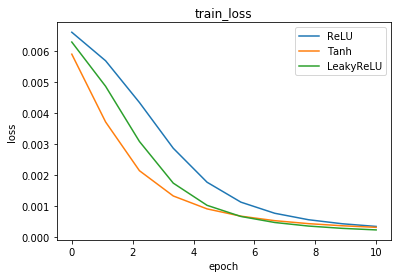

In [48]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,c2_Train_ls[0],label='ReLU',linewidth=1.5)
plt.plot(x,c2_Train_ls[1],label='Tanh',linewidth=1.5)
plt.plot(x,c2_Train_ls[2],label='LeakyReLU',linewidth=1.5)
my_x_ticks = np.arange(0, 12, 2)
plt.xticks(my_x_ticks)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('train_loss')
plt.show()

**多分类任务使用三种不同的激活函数**

In [2]:
#生成数据

#下载MNIST手写数字数据集
train_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, transform = transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [3]:
#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 100

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype = torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs,dtype=torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [4]:
#定义损失函数
loss = nn.CrossEntropyLoss()

In [5]:
#模型训练
def train():
    num_epochs = 20
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls, count = 0, 0
        for X,y in test_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

* LeakReLU

In [14]:
#定义网络
class muti_class_LinearNet(nn.Module):
    def __init__(self,num_inputs, num_outputs, num_hiddens):
        super(muti_class_LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.leakrelu = nn.functional.leaky_relu
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.leakrelu(x,0.2)
        x = self.linear2(x)
        y = self.leakrelu(x,0.2)
        return y
    
net = muti_class_LinearNet(num_inputs, num_outputs, num_hiddens)
for param in net.parameters():
    nn.init.normal_(param,mean=0, std= 0.01)

In [9]:
#定义优化器
optimizer = torch.optim.SGD(net.parameters(),lr = 0.001)

In [10]:
train_ls,test_ls = train()

epoch: 1, train loss: 0.071735, test loss: 0.071522
epoch: 2, train loss: 0.070664, test loss: 0.069555
epoch: 3, train loss: 0.066870, test loss: 0.063144
epoch: 4, train loss: 0.057366, test loss: 0.050314
epoch: 5, train loss: 0.043777, test loss: 0.036948
epoch: 6, train loss: 0.032888, test loss: 0.028407
epoch: 7, train loss: 0.026279, test loss: 0.023359
epoch: 8, train loss: 0.022265, test loss: 0.020200
epoch: 9, train loss: 0.019665, test loss: 0.018075
epoch: 10, train loss: 0.017865, test loss: 0.016562
epoch: 11, train loss: 0.016547, test loss: 0.015444
epoch: 12, train loss: 0.015542, test loss: 0.014543
epoch: 13, train loss: 0.014749, test loss: 0.013838
epoch: 14, train loss: 0.014107, test loss: 0.013260
epoch: 15, train loss: 0.013580, test loss: 0.012801
epoch: 16, train loss: 0.013138, test loss: 0.012407
epoch: 17, train loss: 0.012763, test loss: 0.012069
epoch: 18, train loss: 0.012440, test loss: 0.011771
epoch: 19, train loss: 0.012157, test loss: 0.011512
ep

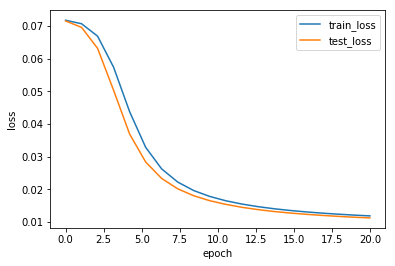

In [11]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label='train_loss',linewidth=1.5)
plt.plot(x,test_ls,label='test_loss',linewidth=1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
leak_train_ls, leak_test_ls = train_ls, test_ls

* Relu

In [13]:
#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 100

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype = torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs,dtype=torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [15]:
#定义网络
class muti_class_LinearNet(nn.Module):
    def __init__(self,num_inputs, num_outputs, num_hiddens):
        super(muti_class_LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.relu(x)
        return y
    
net = muti_class_LinearNet(num_inputs, num_outputs, num_hiddens)
for param in net.parameters():
    nn.init.normal_(param,mean=0, std= 0.01)

In [16]:
#定义优化器
optimizer = torch.optim.SGD(net.parameters(),lr = 0.001)

In [17]:
train_ls,test_ls = train()

epoch: 1, train loss: 0.071734, test loss: 0.071547
epoch: 2, train loss: 0.070850, test loss: 0.070035
epoch: 3, train loss: 0.068227, test loss: 0.065785
epoch: 4, train loss: 0.062105, test loss: 0.057685
epoch: 5, train loss: 0.053591, test loss: 0.049241
epoch: 6, train loss: 0.046330, test loss: 0.043083
epoch: 7, train loss: 0.041306, test loss: 0.038948
epoch: 8, train loss: 0.037869, test loss: 0.036043
epoch: 9, train loss: 0.035384, test loss: 0.033880
epoch: 10, train loss: 0.033497, test loss: 0.032198
epoch: 11, train loss: 0.032009, test loss: 0.030847
epoch: 12, train loss: 0.030806, test loss: 0.029766
epoch: 13, train loss: 0.029824, test loss: 0.028865
epoch: 14, train loss: 0.029014, test loss: 0.028132
epoch: 15, train loss: 0.028338, test loss: 0.027517
epoch: 16, train loss: 0.027768, test loss: 0.027000
epoch: 17, train loss: 0.027283, test loss: 0.026559
epoch: 18, train loss: 0.026866, test loss: 0.026186
epoch: 19, train loss: 0.026504, test loss: 0.025838
ep

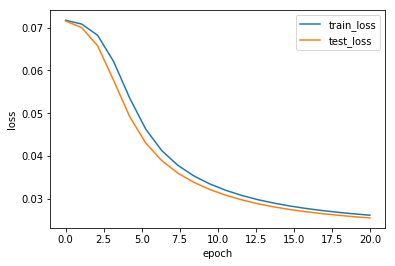

In [19]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label='train_loss',linewidth=1.5)
plt.plot(x,test_ls,label='test_loss',linewidth=1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
relu_train_ls, relu_test_ls = train_ls, test_ls

* tanh

In [27]:
#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 100

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype = torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs,dtype=torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [28]:
#定义网络
class muti_class_LinearNet(nn.Module):
    def __init__(self,num_inputs, num_outputs, num_hiddens):
        super(muti_class_LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.tanh = torch.tanh
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.tanh(x)
        x = self.linear2(x)
        y = self.tanh(x)
        return y
    
net = muti_class_LinearNet(num_inputs, num_outputs, num_hiddens)
for param in net.parameters():
    nn.init.normal_(param,mean=0, std= 0.01)

In [29]:
#定义优化器
optimizer = torch.optim.SGD(net.parameters(),lr = 0.001)

In [30]:
train_ls,test_ls = train()

epoch: 1, train loss: 0.071107, test loss: 0.069989
epoch: 2, train loss: 0.067414, test loss: 0.064024
epoch: 3, train loss: 0.060267, test loss: 0.056608
epoch: 4, train loss: 0.054263, test loss: 0.051957
epoch: 5, train loss: 0.050434, test loss: 0.048734
epoch: 6, train loss: 0.047583, test loss: 0.046209
epoch: 7, train loss: 0.045359, test loss: 0.044215
epoch: 8, train loss: 0.043584, test loss: 0.042596
epoch: 9, train loss: 0.042141, test loss: 0.041274
epoch: 10, train loss: 0.040972, test loss: 0.040204
epoch: 11, train loss: 0.040025, test loss: 0.039335
epoch: 12, train loss: 0.039246, test loss: 0.038612
epoch: 13, train loss: 0.038594, test loss: 0.038003
epoch: 14, train loss: 0.038036, test loss: 0.037474
epoch: 15, train loss: 0.037549, test loss: 0.037009
epoch: 16, train loss: 0.037119, test loss: 0.036598
epoch: 17, train loss: 0.036735, test loss: 0.036229
epoch: 18, train loss: 0.036390, test loss: 0.035901
epoch: 19, train loss: 0.036081, test loss: 0.035603
ep

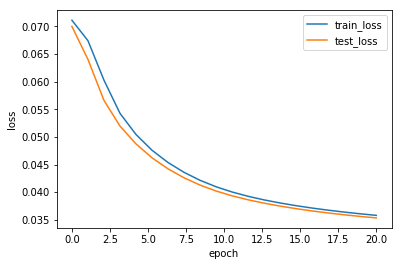

In [32]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label='train_loss',linewidth=1.5)
plt.plot(x,test_ls,label='test_loss',linewidth=1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
tanh_train_ls,tanh_test_ls = train_ls, test_ls

**三种激活函数对比**

* 训练误差

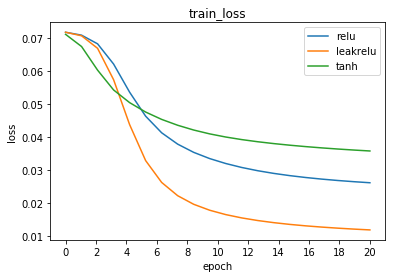

In [40]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,relu_train_ls,label='relu',linewidth=1.5)
plt.plot(x,leak_train_ls,label='leakrelu',linewidth=1.5)
plt.plot(x,tanh_train_ls,label='tanh',linewidth=1.5)
my_x_ticks = np.arange(0, 22, 2)
plt.xticks(my_x_ticks)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('train_loss')
plt.show()

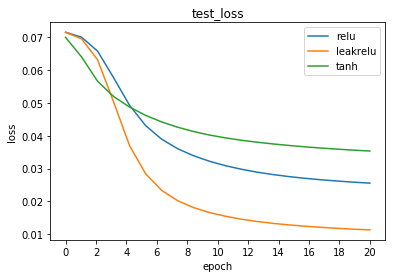

In [42]:
x = np.linspace(0,len(test_ls),len(test_ls))
plt.plot(x,relu_test_ls,label='relu',linewidth=1.5)
plt.plot(x,leak_test_ls,label='leakrelu',linewidth=1.5)
plt.plot(x,tanh_test_ls,label='tanh',linewidth=1.5)
my_x_ticks = np.arange(0, 22, 2)
plt.xticks(my_x_ticks)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('test_loss')
plt.show()